<a href="https://colab.research.google.com/github/josem17-cyber/EDA_PySparkML/blob/main/notebooks/EDA_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=50228d7fbec13516df14c3ef5137b4868097fe1e9c9c69175f0984b81e546f76
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


# 1. Descripción del Análisis Exploratorio de Datos (EDA)

# 2. ¿Cuál es la pregunta que vamos a responder?


# 3. Idea General de nuestro DataSet

En primer lugar importaremos las librerías necesarias:

In [13]:
import urllib.request
import pyspark.pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Después tendremos que generar nuestro **DataFrame** ha partri del **CSV**, y ejecutaremos el head() para hacernos una primera idea de la apariencia de nuestros datos.

In [17]:
# Descargar el archivo CSV
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
local_path = "/tmp/insurance.csv"
urllib.request.urlretrieve(url, local_path)

# Cargar el dataset desde el archivo local
df = ps.read_csv(local_path)

# Convert the PySpark Pandas DataFrame to a Pandas DataFrame
df = df.to_pandas()

# Mostrar las primeras filas del dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Nuestro DataFrame cuenta con unas dimensiones de 1337 filas x 7 columnas. Las filas son el número de clientes de un seguro sanitario. Las columnas representasn las variables o características que tenemos de cada pasajero (features).

In [5]:
df.shape

(1338, 7)

Aquí podemos observar cuales son nuestras columnas en una lista:

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

El siguiente método nos permite sacar **información general** de nuestro dataset, esto es muy útil y podemos ver como hay una serie de información que utilizaremos más adelante en el análisis.

In [8]:
df['region'].unique()

0    northwest
1    southeast
2    northeast
3    southwest
Name: region, dtype: object

In [ ]:
# Información general del dataset
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int32  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int32  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), object(3)

Pasemos a definir nuestros datos, tanto el **significado**, como la **categorización** o los **tipos de datos**.

# 4. Definiendo los Datos

En este apartado nos encargaremos de definir los datos tanto el significado, como la categorización o los tipos de datos. Esto es realmente útil para tener una idea general del comportamiento de nuestros datos, y además nos servirá para crear distintos tipos de gráficos dependiendo de su categorización.

## 4.1 Descripción de las Variables

En primer lugar veremos el significado de cada variable:
- age: edad del beneficiario principal
- sex: género del contratante del seguro, femenino, masculino
- bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, de los pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente entre 18,5 y 24,9.
- children: número de hijos cubiertos por el seguro de salud / número de dependientes
- smoker: si fuma o no
- region: área de residencia del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.
- charges: costos médicos individuales facturados por el seguro de salud.


## 4.2 Clasificación de Variables

Después veremos la clasificación de estas variables, es decir si son numéricas o categóricas, y dentro de esto si son discretos o continuos, o nominales, binarios u ordinales respectivamente:

- Variables Categóricas
  - Variables Nominales: region
  - Variables Binarias: sex, smoker
- Variables Numéricas
  - Variables Discretas: age, children
  - Variables Continuas: bmi, charges

## 4.3 Tipos de Datos

En este apartado podemos ver los tipos de datos de las variables de cada columna:

In [9]:
df.dtypes

,0
age,int32
sex,object
bmi,float64
children,int32
smoker,object
region,object
charges,float64


- int32(2): age y children
- float64(2): bmi y charges
- object(3): sex, smoker y region

# 5. Datos Faltantes

En primer lugar veremos que columnas tienen valores nulos en nuestro dataset. Como podemos observar no tenemos valores nulos en este dataset.

In [12]:
df.columns[df.isnull().any().to_numpy()]

Index([], dtype='object')

# 6. Comprensión de los Datos

## 6.1 Variables Categóricas

### 6.1.1 region

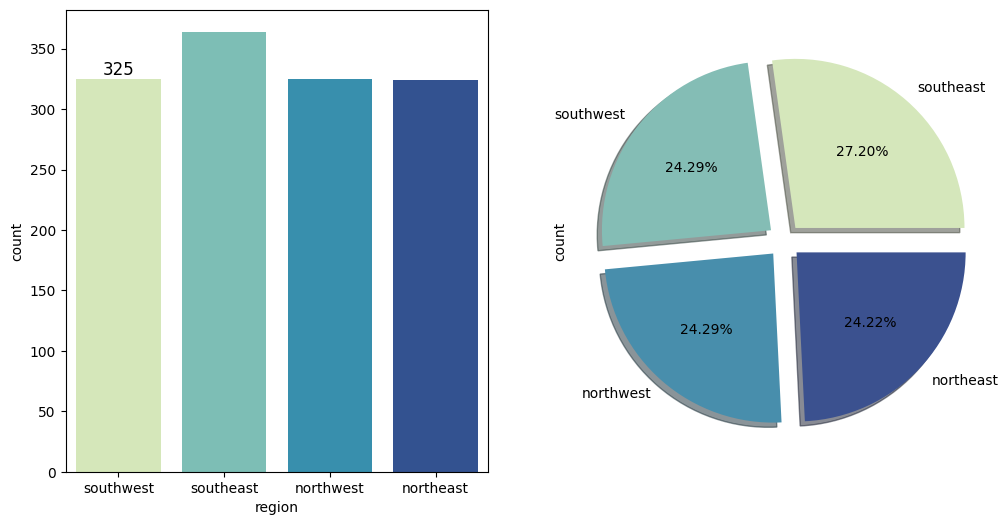

In [23]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'region' del DataFrame
sns.countplot(x='region', data=df, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'region'
df['region'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#D5E7BB", "#84BDB5", "#488EAC", "#3B518F"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

### 6.1.2 sex

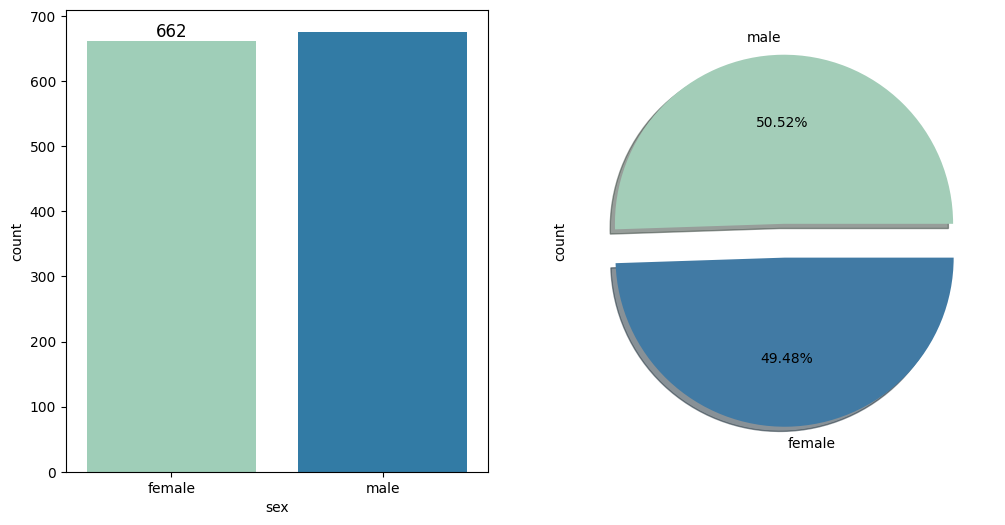

In [26]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'sex' del DataFrame
sns.countplot(x='sex', data=df, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'sex'
df['sex'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#A3CDB8", "#417AA4"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

### 6.1.3 smoker

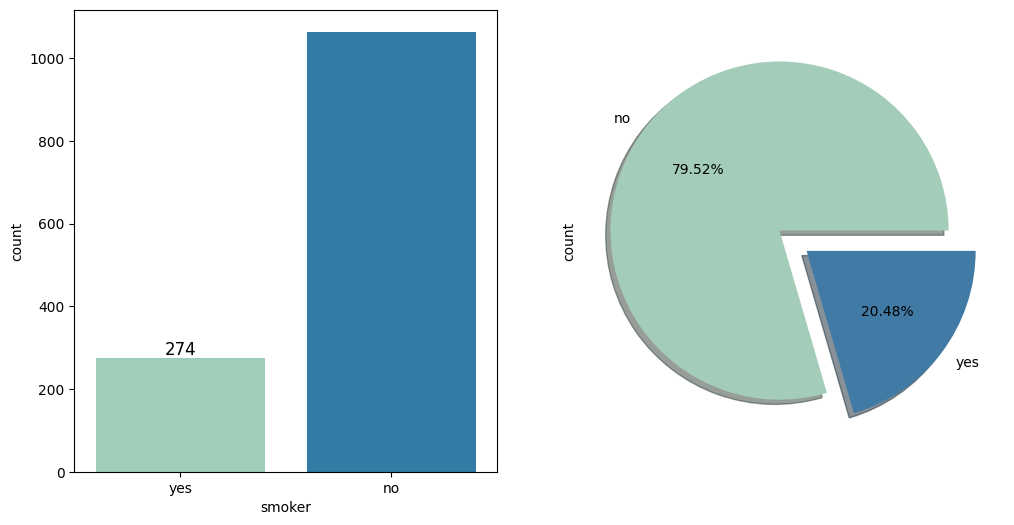

In [27]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'smoker' del DataFrame
sns.countplot(x='smoker', data=df, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'smoker'
df['smoker'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#A3CDB8", "#417AA4"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

## 6.2 Variables Numéricas

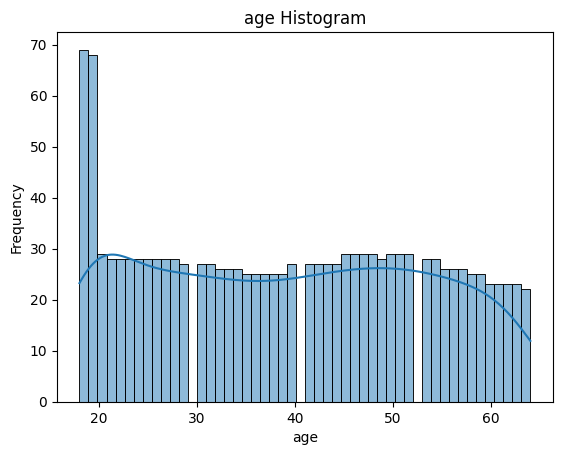

In [28]:
# Crear el histograma de la tarifa ('age')
g2 = sns.histplot(df['age'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('age Histogram')

# Mostrar el histograma
plt.show()

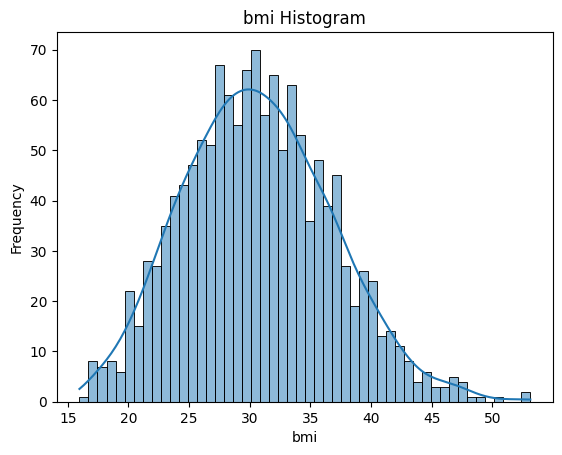

In [29]:
# Crear el histograma de la tarifa ('bmi')
g2 = sns.histplot(df['bmi'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('bmi Histogram')

# Mostrar el histograma
plt.show()

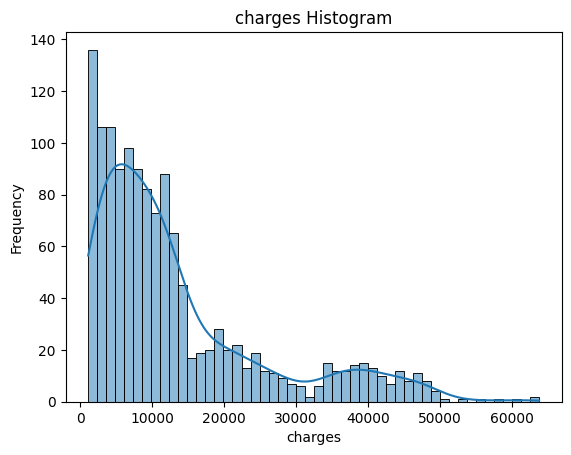

In [30]:
# Crear el histograma de la tarifa ('charges')
g2 = sns.histplot(df['charges'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('charges Histogram')

# Mostrar el histograma
plt.show()

## 6.3 Comparación de cada variable

# 7. Feature Engineering

# 8. Modelo de Machine Learning

# 9. Conclusiones